In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Linear Regression without train test split with Advertising data

In [2]:
df = pd.read_csv('/content/sample_data/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Dividing Dataet into Dependent and Indpendent column**

In [ ]:
x = df.drop(columns='sales',axis=1)     # independent columns
y = df.sales                     # dependent column

In [ ]:
x.shape

(200, 3)

**Train Test Split**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()   # creating object of StandardScaler


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()     # creating object of LinearRegression

In [ ]:
# Training the Data
lr.fit(x,y)

LinearRegression()

In [ ]:
lr.intercept_

2.938889369459412

In [ ]:
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
# checking accuracy of the model (R^2)  (1-RSS)/TSS : Residual Summation of Square  : Total Summation of Square
lr.score(x,y)

0.8972106381789522

In [ ]:
# Adjusted R^2
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
adj_r2(x,y) # Adjusted R^2 value

0.8956373316204668

In [ ]:
# Now lets predict and see the prediction 
lr.predict([[44.5,39.3,45.1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([12.33785482])

In [ ]:
# lets see the contribution of each variable in building the model
import statsmodels.formula.api as smf
lrs = smf.ols(formula = 'sales~TV+radio+newspaper', data = df).fit()
lrs.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        19:17:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression with Admission Prediction data

In [5]:
# With Admission data
df = pd.read_csv('/content/sample_data/Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.isnull().sum()/len(df)*100

Serial No.           0.0
GRE Score            3.0
TOEFL Score          2.0
University Rating    3.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [9]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating'].fillna(3,inplace=True)

In [10]:
# After imputation check for missing value
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
# sno do not require so drop it
df.drop(columns='Serial No.',axis=1,inplace=True)

In [12]:
df.head(4)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80


In [13]:
# Independent and label column
x = df.drop(columns='Chance of Admit',axis=1)
y = df['Chance of Admit']

In [14]:
# Scaling data using StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # object of StandardScaler

In [15]:
x = sc.fit_transform(x)

In [16]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [17]:
x1 = pd.DataFrame(x,columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'])

In [18]:
# After scaling
x1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,4.384049e-15,9.521273e-16,1.278977e-16,-8.526513e-17,4.263256e-17,3.119283e-15,-7.815970e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.394225e+00,-2.512331e+00,-1.877887e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-1.128152e+00
25%,-6.814090e-01,-6.927310e-01,-9.912547e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-1.128152e+00
50%,5.124333e-15,-3.105811e-02,-1.046226e-01,1.272712e-01,1.730621e-02,-2.720919e-02,8.864053e-01
75%,6.708143e-01,7.960330e-01,7.820095e-01,6.323155e-01,5.581253e-01,7.672196e-01,8.864053e-01
max,2.113186e+00,2.119379e+00,1.668642e+00,1.642404e+00,1.639763e+00,2.223672e+00,8.864053e-01


In [ ]:
# Now check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
vif = pd.DataFrame()
vif['Feature_name'] = x1.columns
vif['Vif_score'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]

In [ ]:
vif

,Feature_name,Vif_score
0,GRE Score,4.152735
1,TOEFL Score,3.793345
2,University Rating,2.517272
3,SOP,2.776393
4,LOR,2.037449
5,CGPA,4.654369
6,Research,1.459411


In [19]:
# Preprocessing is done, now train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size=.10,random_state = 100)

**Without Cross Validtion**

In [ ]:
# Creating model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()  # object of LinearRegression model

In [ ]:
# Training the model
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

0.7204105151364021

In [ ]:
lr.coef_

array([ 0.01911296,  0.01653803,  0.00511594, -0.00048852,  0.01744589,
        0.07524518,  0.01271438])

In [ ]:
# R^2 score
lr.score(x_test,y_test)

0.8454760235573159

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score1 = r2_score(y_pred,y_test)

In [ ]:
r2_score1

0.8309879240802984

In [ ]:
# Adjusted R^2
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
adj_r2(x_test,y_test)

0.8197220274835352

In [ ]:
# lr.predict([[337.000000,118.0,4.0,4.5,4.5,9.65,1]]) without scaling o/p: array([9.94856661])
lr.predict(sc.transform([[337.000000,118.0,4.0,4.5,4.5,9.65,1]]))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.95279306])

# **with cross validation**

In [ ]:
# importing library for linearRegression
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()   # object of LR

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold_validation = KFold(10)
score = cross_val_score(lr2, x_train, y_train, cv = kfold_validation)
print(score)
print(np.mean(score))

# mse = cross_val_score(lr2, x_train, y_train,scoring = 'neg_mean_squared_error' cv = kfold_validation)
#print(mse)
#print(np.mean(mse))

#       or
#   score = cross_val_score(lr2, x_train, y_train, cv = 10)  no need to import KFold library

[0.81730527 0.80350655 0.83616237 0.89467091 0.67668071 0.7560473
 0.82687938 0.66674253 0.86002947 0.83681753]
0.7974842012523997


**Ridge Regression**

In [ ]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge = Ridge()

# parameters
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,30]}

ridge_regressor = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
# ridge_regressor.score(x_test,y_test)

{'alpha': 5}
-0.003783965914216285


In [ ]:
# Calculating R^2 Score

y_pred = ridge_regressor.predict(x_test)

from sklearn.metrics import r2_score
r2_score1 = r2_score(y_pred,y_test)


In [ ]:
print(r2_score1)

0.8309641229662583


**Lasso Regression**

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,30]}
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
# Model Training
lasso_regressor.fit(x_test,y_test)

In [ ]:
# Model Prediction
y_pred = lasso_regressor.predict(x_test)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-0.003721211523010484


In [ ]:
# Calculating R^2 Score

y_pred = lasso_regressor.predict(x_test)

from sklearn.metrics import r2_score
r2_score1 = r2_score(y_pred,y_test)

In [ ]:
r2_score1

0.8166898850715952

# RidgeCV, LassoCV, ElasticNetCV

In [40]:
from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV, ElasticNetCV, ElasticNet

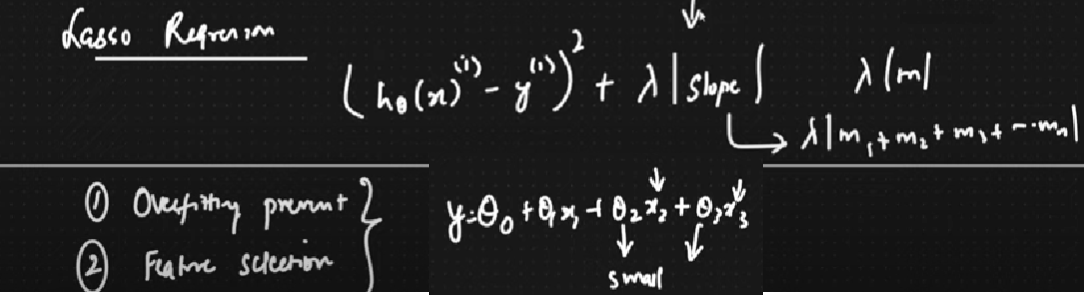

In [ ]:
lasso_cv = LassoCV(alphas=None, cv = 10, max_iter =100, normalize = True)
lasso_cv.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=10, max_iter=100, normalize=True)

In [ ]:
lasso_cv.alpha_

5.0843009309573905e-05

In [ ]:
lasso_model = Lasso(alpha = lasso_cv.alpha_) # this is our model for lasso regression

In [ ]:
# Model Training
lasso_model.fit(x_train,y_train)

Lasso(alpha=5.0843009309573905e-05)

In [ ]:
# Model prediction
y_pred = lasso_model.predict(x_test)

In [ ]:
# Performance Metrics   = R square
from sklearn.metrics import r2_score
lasso_r2_score = r2_score(y_pred,y_test)
print(lasso_r2_score)

0.8312461230204866


In [ ]:
# Accuracy
lasso_model.score(x_test,y_test)

0.8457684576273363

**Ridge Regression** L2 Regularization

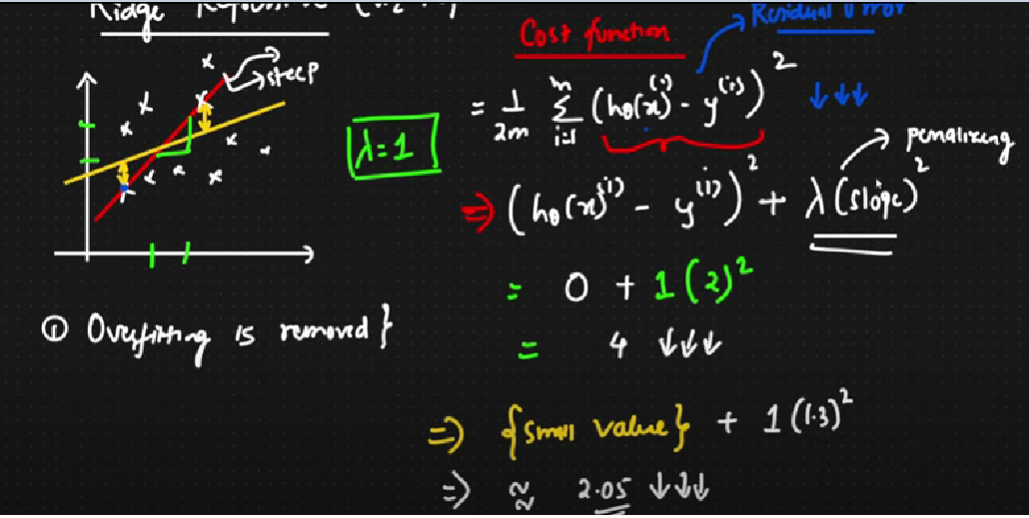

In [26]:
# Create Ridge Model
ridgecv = RidgeCV(alphas = np.random.uniform(0,10,50), cv =10, normalize = True )

In [ ]:
# Train Ridge Model
ridgecv.fit(x_train,y_train)

In [29]:
# Find the best possible alpha value for ridge
ridgecv.alpha_

0.06784502975561102

In [32]:
# Now we have got the alpha value, now we can create a model
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)   # Training the model

Ridge(alpha=0.06784502975561102)

In [34]:
y_pred = ridge_model.predict(x_test)

In [33]:
# Checking the accuracy
ridge_model.score(x_test,y_test)

0.8455037624354749

In [35]:
# Checking the R square for Ridge Model
from sklearn.metrics import r2_score
ridge_r2_score = r2_score(y_pred,y_test)
print(ridge_r2_score)

0.8309896242050848


Elasticnet

In [36]:
elastic = ElasticNetCV(alphas= None, cv =10)

In [37]:
elastic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [38]:
elastic.alpha_

0.0019950951571036965

In [39]:
elastic.l1_ratio_

0.5

In [43]:
# Creating ElasticNet Model
elastic_model = ElasticNet(alpha = elastic.alpha_, l1_ratio = elastic.l1_ratio_ )

# Training the Model
elastic_model.fit(x_train,y_train)

ElasticNet(alpha=0.0019950951571036965)

In [44]:
# Accuracy
elastic_model.score(x_test,y_test)

0.846354276648462

In [45]:
# Prediction on ElasticNet Model
elastic_model.predict(sc.transform([[337.000000,118.0,4.0,4.5,4.5,9.65,1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"


array([0.95087687])

In [48]:
# Making Prediction
y_pred = elastic_model.predict(x_test)

Residual Plot

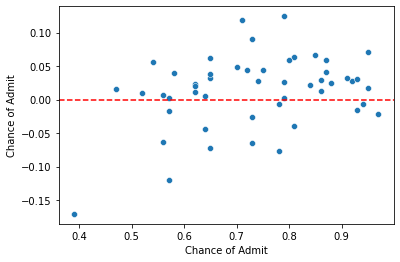

In [55]:
sns.scatterplot(x=y_test, y= (y_test-y_pred))
plt.axhline(y=0, color = 'r', ls = '--')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


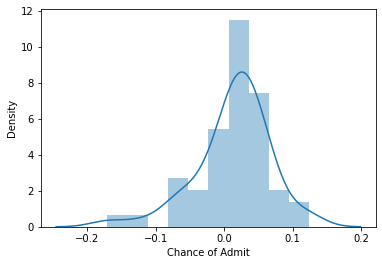

In [54]:
sns.distplot(y_test-y_pred, bins = 10)